# ANÁLISIS EXPLORATORIO DE DATOS

Este notebook contiene el reporte preliminar de datos que serán utilizados durante el proyecto. 



In [26]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt


## Carga de datos

In [2]:
df = pd.read_excel('data/catalogo_streaming.xlsx')
df.head()

,title,platform,type,imdbVotes,imdbScore,tmdbPopularity,tmdbScore,runtime,genres,director,year_range,url
0,Cadena perpetua,Max,MOVIE,2906253.0,9.3,159.594,8.705,142,"Drama, Crimen",Frank Darabont,1900_2002,https://play.max.com/movie/9b4dacba-2f80-4272-...
1,El caballero oscuro,Max,MOVIE,2893241.0,9.0,111.674,8.516,152,"Misterio & Suspense, Drama, Acción & Aventura,...",Christopher Nolan,2003_2010,https://play.max.com/movie/52217243-a137-45d6-...
2,Origen,Max,MOVIE,2570263.0,8.8,139.644,8.369,148,"Ciencia ficción, Acción & Aventura, Misterio &...",Christopher Nolan,2003_2010,https://play.max.com/movie/14552c93-d318-4563-...
3,El club de la lucha,Disney Plus,MOVIE,2345071.0,8.8,108.297,8.400,139,Drama,David Fincher,1998_2004,https://disneyplus.bn5x.net/c/1206980/705874/9...
4,El club de la lucha,Netflix,MOVIE,2345071.0,8.8,108.297,8.400,139,Drama,David Fincher,1995_2005,http://www.netflix.com/title/26004747


In [3]:
print('Cantidad de registros :', df.__len__())

Cantidad de registros : 19817


## Funciones utiles

In [96]:
def get_value_counts(dataframe: pd.DataFrame, column_name: str) -> pd.Series:
    """
    :param dataframe: The pandas DataFrame containing the data.
    :param column_name: The name of the column for which to get the value counts.
    :return: A pandas Series object containing the counts of each unique value in the specified column.
    """
    return dataframe[column_name].value_counts()


def count_values_in_column(dataframe: pd.DataFrame, column_name: str) -> pd.Series:
    """
    :param dataframe: A pandas DataFrame containing the data.
    :param column_name: The name of the column for which the values need to be counted.
    :return: A pandas Series object containing the count of each unique value in the specified column.
    """
    return get_value_counts(dataframe, column_name)


def filter_values_equal_than_k(dataframe : pd.DataFrame, column_name: str, k=1) -> pd.DataFrame:
    """
    Filters the values in the specified column of the given dataframe,
    keeping only the ones that occur equal than k value.

    :param dataframe: The dataframe containing the data.
    :type dataframe: pandas.DataFrame
    :param column_name: The name of the column to filter.
    :type column_name: str
    :k variable: The number of values to filter.
    :type k: int
    :return: A new dataframe with the filtered values.
    :rtype: pandas.DataFrame
    """
    value_counts = get_value_counts(dataframe, column_name)
    return value_counts[value_counts == k]


def filter_values_greater_than_k(dataframe : pd.DataFrame, column_name: str, k=1) -> pd.DataFrame:
    """
    Filters the values in the specified column of the given dataframe,
    keeping only the ones that occur more than k value.

    :param dataframe: The dataframe containing the data.
    :type dataframe: pandas.DataFrame
    :param column_name: The name of the column to filter.
    :type column_name: str
    :k variable: The number of values to filter.
    :type k: int
    :return: A new dataframe with the filtered values.
    :rtype: pandas.DataFrame
    """
    value_counts = get_value_counts(dataframe, column_name)
    return value_counts[value_counts > k]

def filter_values_lower_than_k(dataframe : pd.DataFrame, column_name: str, k=1) -> pd.DataFrame:
    """
    Filters the values in the specified column of the given dataframe,
    keeping only the ones that occur less than k value.

    :param dataframe: The dataframe containing the data.
    :type dataframe: pandas.DataFrame
    :param column_name: The name of the column to filter.
    :type column_name: str
    :k variable: The number of values to filter.
    :type k: int
    :return: A new dataframe with the filtered values.
    :rtype: pandas.DataFrame
    """
    value_counts = get_value_counts(dataframe, column_name)
    return value_counts[value_counts <= k]

## Descripciones iniciales

In [84]:
# Descripción de los datos
df.describe(include=object).T

,count,unique,top,freq
title,19817,18008,La niñera,5
platform,19817,6,Netflix,7109
type,19817,2,MOVIE,14060
genres,19665,4189,[Documental],1277
director,14626,8812,Steven Spielberg,27
year_range,19817,27,2022,1697
url,19817,19062,http://www.netflix.com/title/81662957,2


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
imdbVotes,17854.0,48388.577630,148847.265886,5.000,462.00000,2849.5000,21969.75000,2906253.000
imdbScore,17927.0,6.399520,1.200258,1.100,5.70000,6.5000,7.30000,9.700
tmdbPopularity,19538.0,41.195589,131.031366,0.001,5.43325,14.4285,33.31250,4173.518
tmdbScore,18954.0,6.461363,1.254487,0.500,5.88950,6.6000,7.27375,10.000
runtime,19817.0,80.542867,37.092943,0.000,48.00000,89.0000,105.00000,263.000


### title

Vemos que la variable referente al título no es única para todos registros que existen.

In [7]:
# Títulos que aparecen más de una vez
filtered_value_counts = filter_values_greater_than_one(df, column_name='title')
filtered_value_counts

title
La niñera                         5
La momia                          5
Perdida                           5
La boda de mi mejor amigo         5
El Grinch                         5
                                 ..
Ruslan: Venganza de un asesino    2
Dexter                            2
El lobo de Wall Street            2
La tormenta perfecta              2
Locuras en la universidad         2
Name: count, Length: 1631, dtype: int64

<Axes: ylabel='Frequency'>

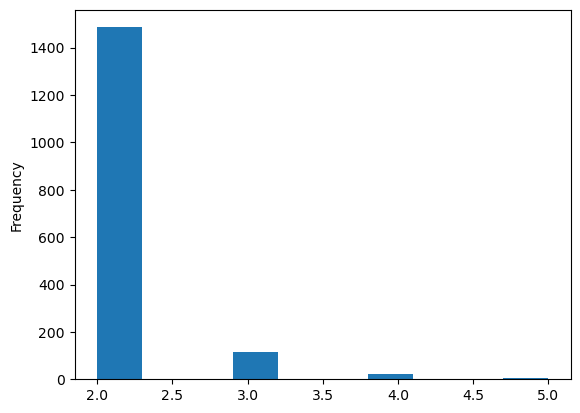

In [8]:
filtered_value_counts.plot(kind='hist')

In [9]:
# Mirando un registro en específico
df.loc[df['title'] == 'La momia']

,title,platform,type,imdbVotes,imdbScore,tmdbPopularity,tmdbScore,runtime,genres,director,year_range,url
413,La momia,Disney Plus,MOVIE,464416.0,7.1,87.481,6.929,124,"Acción & Aventura, Fantasía",Stephen Sommers,1998_2004,https://disneyplus.bn5x.net/c/1206980/705874/9...
414,La momia,Amazon Prime Video,MOVIE,464416.0,7.1,87.481,6.929,124,"Acción & Aventura, Fantasía",Stephen Sommers,1998_2004,https://app.primevideo.com/detail?gti=amzn1.dv...
1162,La momia,Max,MOVIE,207602.0,5.4,123.168,5.510,110,"Misterio & Suspense, Acción & Aventura, Terror...",Alex Kurtzman,2016_2019,https://play.max.com/movie/c4fe03b2-1c83-4750-...
1163,La momia,Netflix,MOVIE,207602.0,5.4,123.168,5.510,110,"Misterio & Suspense, Acción & Aventura, Terror...",Alex Kurtzman,2013_2017,http://www.netflix.com/title/80161352
1164,La momia,Amazon Prime Video,MOVIE,207602.0,5.4,123.168,5.510,110,"Misterio & Suspense, Acción & Aventura, Terror...",Alex Kurtzman,2017_2018,https://app.primevideo.com/detail?gti=amzn1.dv...


Se puede observar que en este registro en particular, podemos ver 2 casos:

- Se repite el valor para cada plataforma 
- Se repiten títulos para diferentes películas y se diferencian por año de lanzamiento

En este notebook no se tiene como objetivo hacer una limpieza de datos por lo que este caso solo se reporta y no sé interviene. 

### platform

Análisis de contenido en las plataformas

In [13]:
platform_counts = count_values_in_column(df, column_name='platform').to_frame(name='count') # se pasa a dataframe para manipularlo
platform_counts

,count
platform,
Netflix,7109
Amazon Prime Video,6436
Disney Plus,2980
Max,2585
Paramount Plus,475
Apple TV Plus,232


In [23]:
platform_counts['percentage'] = ( platform_counts['count'] / platform_counts['count'].sum() ) * 100 
platform_counts

,count,percentage
platform,,
Netflix,7109,35.873240
Amazon Prime Video,6436,32.477166
Disney Plus,2980,15.037594
Max,2585,13.044356
Paramount Plus,475,2.396932
Apple TV Plus,232,1.170712


array([<Axes: title={'center': 'count'}, xlabel='platform'>,
       <Axes: title={'center': 'percentage'}, xlabel='platform'>],
      dtype=object)

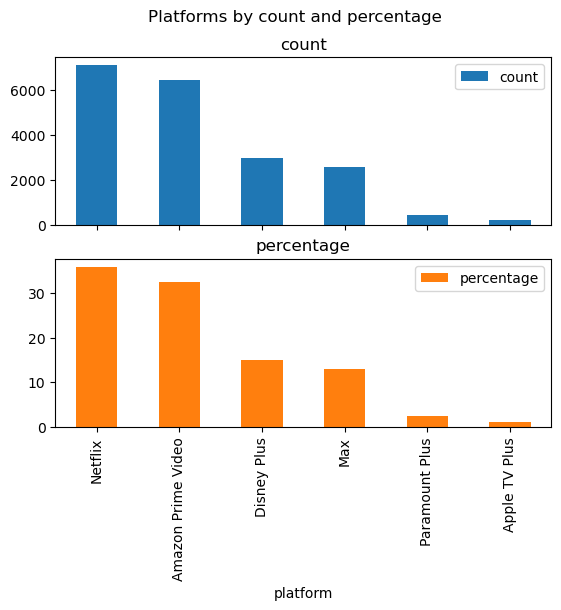

In [42]:
platform_counts.plot(kind='bar',subplots=True, title='Platforms by count and percentage')

Como podemos ver en general Netflix y Amazon representan más del 67% del contenido registrado. Esta variable puede a futuro ser analizada con la calidad de los contenidos que ambas plataformas contienen  

### type

In [45]:
type_counts = count_values_in_column(df, column_name='type')
type_counts

type
MOVIE    14060
SHOW      5757
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of types of content'}, ylabel='count'>

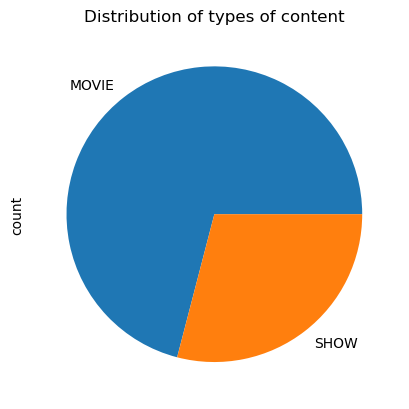

In [62]:
type_counts.plot(kind='pie', title='Distribution of types of content')

En el caso del tipo de contenido vemos que en su mayoría son películas. Esta variable a futuro se puede cruzar con otras para generar más valor

### genres


In [51]:
# pasamos los generos de un string a un array 
df['genres'] = df['genres'].str.split(',', expand=False)
df['genres']

0                                         [Drama,  Crimen]
1        [Misterio & Suspense,  Drama,  Acción & Aventu...
2        [Ciencia ficción,  Acción & Aventura,  Misteri...
3                                                  [Drama]
4                                                  [Drama]
                               ...                        
19812                                    [Ciencia ficción]
19813                                            [Comedia]
19814                                                  NaN
19815                                                  NaN
19816                                           [Fantasía]
Name: genres, Length: 19817, dtype: object

In [60]:
# Copiamos los datos en un nuevo df para expandirlo 
df_genres = df.copy()
df_genres = df_genres.explode('genres') # Expandiendo los géneros 
df_genres['genres'] = [str(genre).strip() for genre in df_genres['genres']] #Limpieza de espacios
df_genres

,title,platform,type,imdbVotes,imdbScore,tmdbPopularity,tmdbScore,runtime,genres,director,year_range,url
0,Cadena perpetua,Max,MOVIE,2906253.0,9.3,159.594,8.705,142,Drama,Frank Darabont,1900_2002,https://play.max.com/movie/9b4dacba-2f80-4272-...
0,Cadena perpetua,Max,MOVIE,2906253.0,9.3,159.594,8.705,142,Crimen,Frank Darabont,1900_2002,https://play.max.com/movie/9b4dacba-2f80-4272-...
1,El caballero oscuro,Max,MOVIE,2893241.0,9.0,111.674,8.516,152,Misterio & Suspense,Christopher Nolan,2003_2010,https://play.max.com/movie/52217243-a137-45d6-...
1,El caballero oscuro,Max,MOVIE,2893241.0,9.0,111.674,8.516,152,Drama,Christopher Nolan,2003_2010,https://play.max.com/movie/52217243-a137-45d6-...
1,El caballero oscuro,Max,MOVIE,2893241.0,9.0,111.674,8.516,152,Acción & Aventura,Christopher Nolan,2003_2010,https://play.max.com/movie/52217243-a137-45d6-...
...,...,...,...,...,...,...,...,...,...,...,...,...
19812,Три кота,Netflix,SHOW,NaN,NaN,13.684,5.400,5,Ciencia ficción,NaN,2013_2017,http://www.netflix.com/title/81208524
19813,أم الدراهم,Amazon Prime Video,SHOW,NaN,NaN,0.858,NaN,29,Comedia,NaN,2021,https://app.primevideo.com/detail?gti=amzn1.dv...
19814,ورق مسموم,Amazon Prime Video,SHOW,NaN,NaN,0.600,NaN,48,nan,NaN,2022,https://app.primevideo.com/detail?gti=amzn1.dv...
19815,ガクドリ,Amazon Prime Video,MOVIE,NaN,NaN,2.841,NaN,90,nan,Kei Era,2011_2013,https://app.primevideo.com/detail?gti=amzn1.dv...


In [61]:
genres_counts = count_values_in_column(df_genres, column_name='genres')
genres_counts

genres
Drama                  9389
Comedia                7196
Acción & Aventura      4767
Misterio & Suspense    4674
Crimen                 3144
Romance                3139
Familia                3087
Documental             3031
Animación              2534
Fantasía               2434
Ciencia ficción        2291
Terror                 1601
Europeas               1505
Historia                957
Música                  838
Reality TV              771
Deporte                 654
Guerra                  485
Western                 231
nan                     152
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of genres'}, xlabel='genres'>

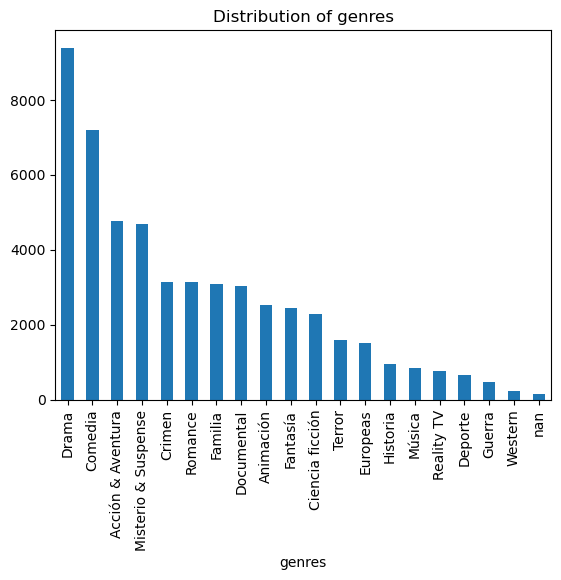

In [63]:
genres_counts.plot(kind='bar', title='Distribution of genres')

Podemos ver que varios géneros pueden pertenecer a un solo título, incluso, pueden existir títulos sin género reportado.

Este dato puede ser interesante comparándolo con el director

# Director

In [66]:
director_counts = count_values_in_column(df, column_name='director')
director_counts

director
Steven Spielberg                   27
Woody Allen                        24
Pedro Almodóvar                    21
Michael Bay                        21
Matías Gueilburt                   19
                                   ..
Kim Kwang-bin                       1
Stephen Sandoval, Tom Caulfield     1
Jessica Dimmock                     1
Jeannie Gaffigan                    1
Kikunojo Onoe                       1
Name: count, Length: 8812, dtype: int64

<Axes: title={'center': 'Distribution of directors'}>

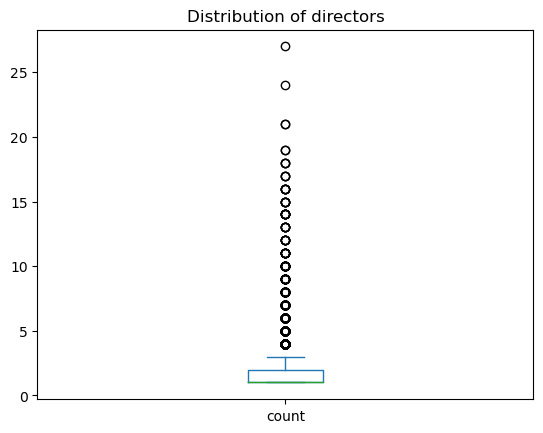

In [74]:
director_counts.plot(kind='box', title='Distribution of directors')

Viendo el boxplot la mayoría de los directores tienen solo un título.  

In [86]:
directors_one_title = filter_values_equal_than_k(df, column_name='director')
print('Cantidad de directores con un solo titulo: ', sum(directors_one_title))

Cantidad de directores con un solo titulo:  6179


Ahora veamos el plot solo con los directores que tienen más de un título.

In [88]:
directors_more_one_title = filter_values_greater_than_k(df, column_name='director')
print('Cantidad de directores con más de un solo titulo: ', sum(directors_more_one_title))

Cantidad de directores con más de un solo titulo:  8447


<Axes: title={'center': 'Distribution of directors'}>

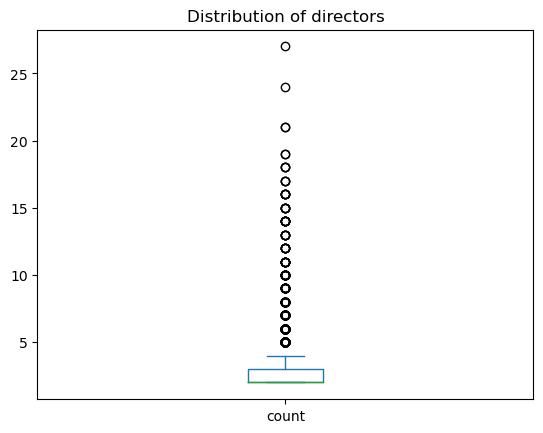

In [89]:
directors_more_one_title.plot(kind='box', title='Distribution of directors')

<Axes: title={'center': 'Distribution of directors'}, ylabel='Frequency'>

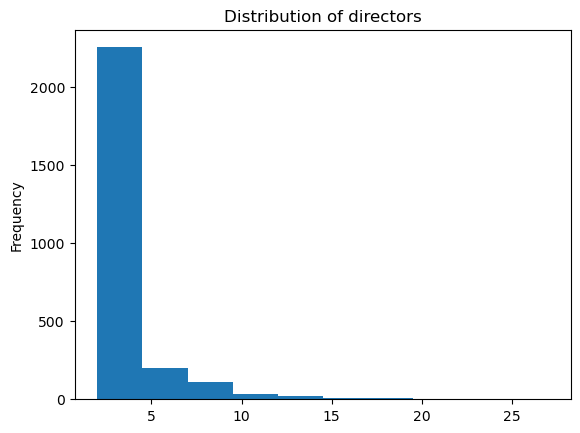

In [94]:
directors_more_one_title.plot(kind='hist', title='Distribution of directors')

Dada la distribución de directores, se buscará hacer una distinctión entre directores con más de 5 títulos y con menos de 5 títulos 

<Axes: title={'center': 'Distribution of directors, count-> 2340'}, xlabel='Directors with more than 5 titles'>

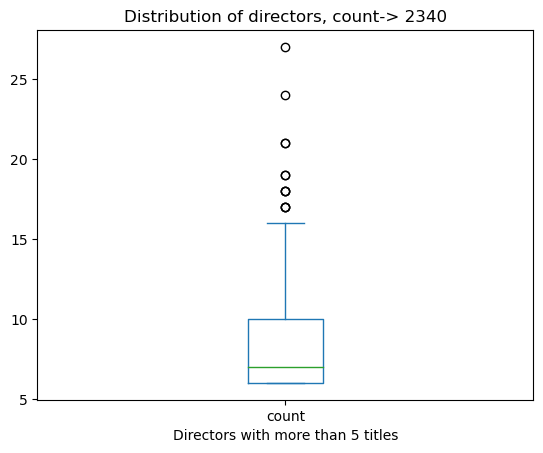

In [104]:
directors_more_five_titles = filter_values_greater_than_k(df, column_name='director', k=5)
directors_more_five_titles.plot(
    kind='box', 
    title=f'Distribution of directors, count-> {sum(directors_more_five_titles)}',
    xlabel = 'Directors with more than 5 titles'
)

<Axes: title={'center': 'Distribution of directors, count-> 12286'}, xlabel='Directors with less than 5 titles'>

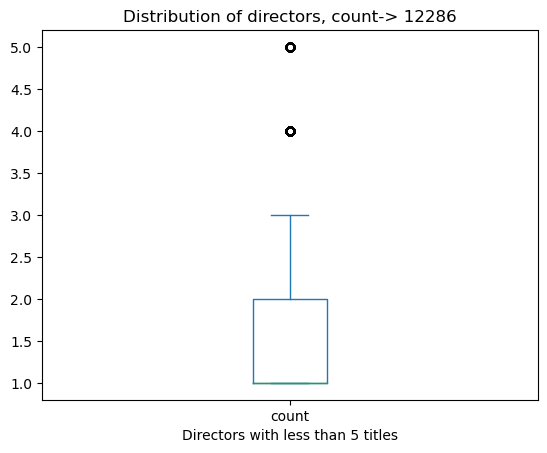

In [105]:
directors_less_five_titles = filter_values_lower_than_k(df, column_name='director', k=5)
directors_less_five_titles.plot(
    kind='box', 
    title=f'Distribution of directors, count-> {sum(directors_less_five_titles)}',
    xlabel = 'Directors with less than 5 titles'
)


Como podemos observar, separar en 2 grupos a los directores por su cantidad de títulos no cambia la distribución de datos particularmente, sin embargo, sirve para entender de forma más amena que existe un subgrupo de directores que tienden a tener más títulos que lo esperado por la distribución que sería un título, esto sin considerarse necesariamente como outliers. 

### year_range

Rango de fechas en las que se lanza la película. 
Para este caso y por comodidad solo tomaremos la fecha minima como valor de estudio, ya que es el valor que usualmente se reporta como fecha de lanzamiento en el gremio de entretenimiento

In [113]:
df_years = df.copy()
df_years['min_year'] = df_years['year_range'].str.split('_')
df_years['min_year'] = df_years['min_year'].str[0]
df_years['min_year'] = df_years['min_year'].astype(int, errors='ignore')
df_years

,title,platform,type,imdbVotes,imdbScore,tmdbPopularity,tmdbScore,runtime,genres,director,year_range,url,min_year
0,Cadena perpetua,Max,MOVIE,2906253.0,9.3,159.594,8.705,142,"[Drama, Crimen]",Frank Darabont,1900_2002,https://play.max.com/movie/9b4dacba-2f80-4272-...,1900
1,El caballero oscuro,Max,MOVIE,2893241.0,9.0,111.674,8.516,152,"[Misterio & Suspense, Drama, Acción & Aventu...",Christopher Nolan,2003_2010,https://play.max.com/movie/52217243-a137-45d6-...,2003
2,Origen,Max,MOVIE,2570263.0,8.8,139.644,8.369,148,"[Ciencia ficción, Acción & Aventura, Misteri...",Christopher Nolan,2003_2010,https://play.max.com/movie/14552c93-d318-4563-...,2003
3,El club de la lucha,Disney Plus,MOVIE,2345071.0,8.8,108.297,8.400,139,[Drama],David Fincher,1998_2004,https://disneyplus.bn5x.net/c/1206980/705874/9...,1998
4,El club de la lucha,Netflix,MOVIE,2345071.0,8.8,108.297,8.400,139,[Drama],David Fincher,1995_2005,http://www.netflix.com/title/26004747,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19812,Три кота,Netflix,SHOW,NaN,NaN,13.684,5.400,5,[Ciencia ficción],NaN,2013_2017,http://www.netflix.com/title/81208524,2013
19813,أم الدراهم,Amazon Prime Video,SHOW,NaN,NaN,0.858,NaN,29,[Comedia],NaN,2021,https://app.primevideo.com/detail?gti=amzn1.dv...,NaN
19814,ورق مسموم,Amazon Prime Video,SHOW,NaN,NaN,0.600,NaN,48,NaN,NaN,2022,https://app.primevideo.com/detail?gti=amzn1.dv...,NaN
19815,ガクドリ,Amazon Prime Video,MOVIE,NaN,NaN,2.841,NaN,90,NaN,Kei Era,2011_2013,https://app.primevideo.com/detail?gti=amzn1.dv...,2011


<Axes: title={'center': 'Distribution of premiere years'}, xlabel='Years'>

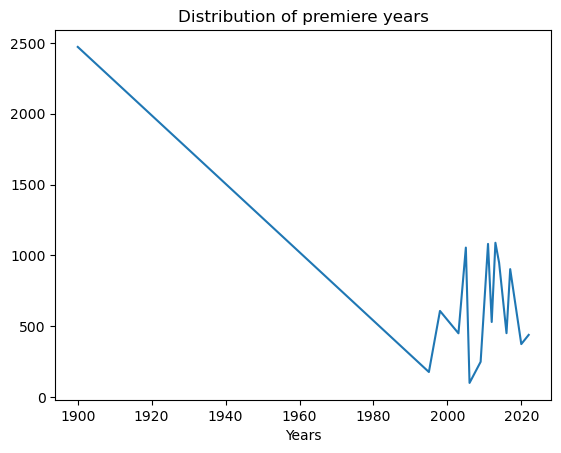

In [135]:
years_counts = count_values_in_column(df_years, column_name='min_year')
years_counts.index = years_counts.index.astype(int)  # Convierte los índices de year_counts a entero
years_counts = years_counts.sort_index()  # Ordena el DataFrame por índice, es decir, año
years_counts.plot(
    kind='line', 
    title='Distribution of premiere years', 
    xlabel='Years',

)

Lastimosamente, se evidencian errores de typo en las fechas por lo que nos veremos en la obligación de filtrar los datos mayores a 1900 para visualizar correctamente la data

<Axes: title={'center': 'Distribution of premiere years'}, xlabel='Years'>

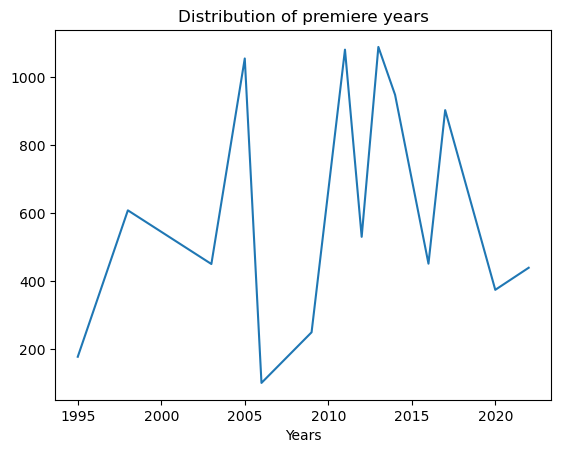

In [138]:
years_counts.drop(1900).plot(
    kind='line',
    title='Distribution of premiere years',
    xlabel='Years',

)

### url

Esta columna es un valor unico por registro que lleva a su recurso en la web por lo que no sustancial para análisis.  